<a href="https://www.kaggle.com/code/gncgulce/k-means-hierarchical-clustering-flo?scriptVersionId=188576280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style='background-color: #cdcdb4; padding: 10px'>
    
<h1> Business Problem</h1>  

FLO wants to segment its customers and develop marketing strategies based on these segments. To achieve this, customer behaviors will be analyzed and groups will be formed based on the clustering of these behaviors.
</div>

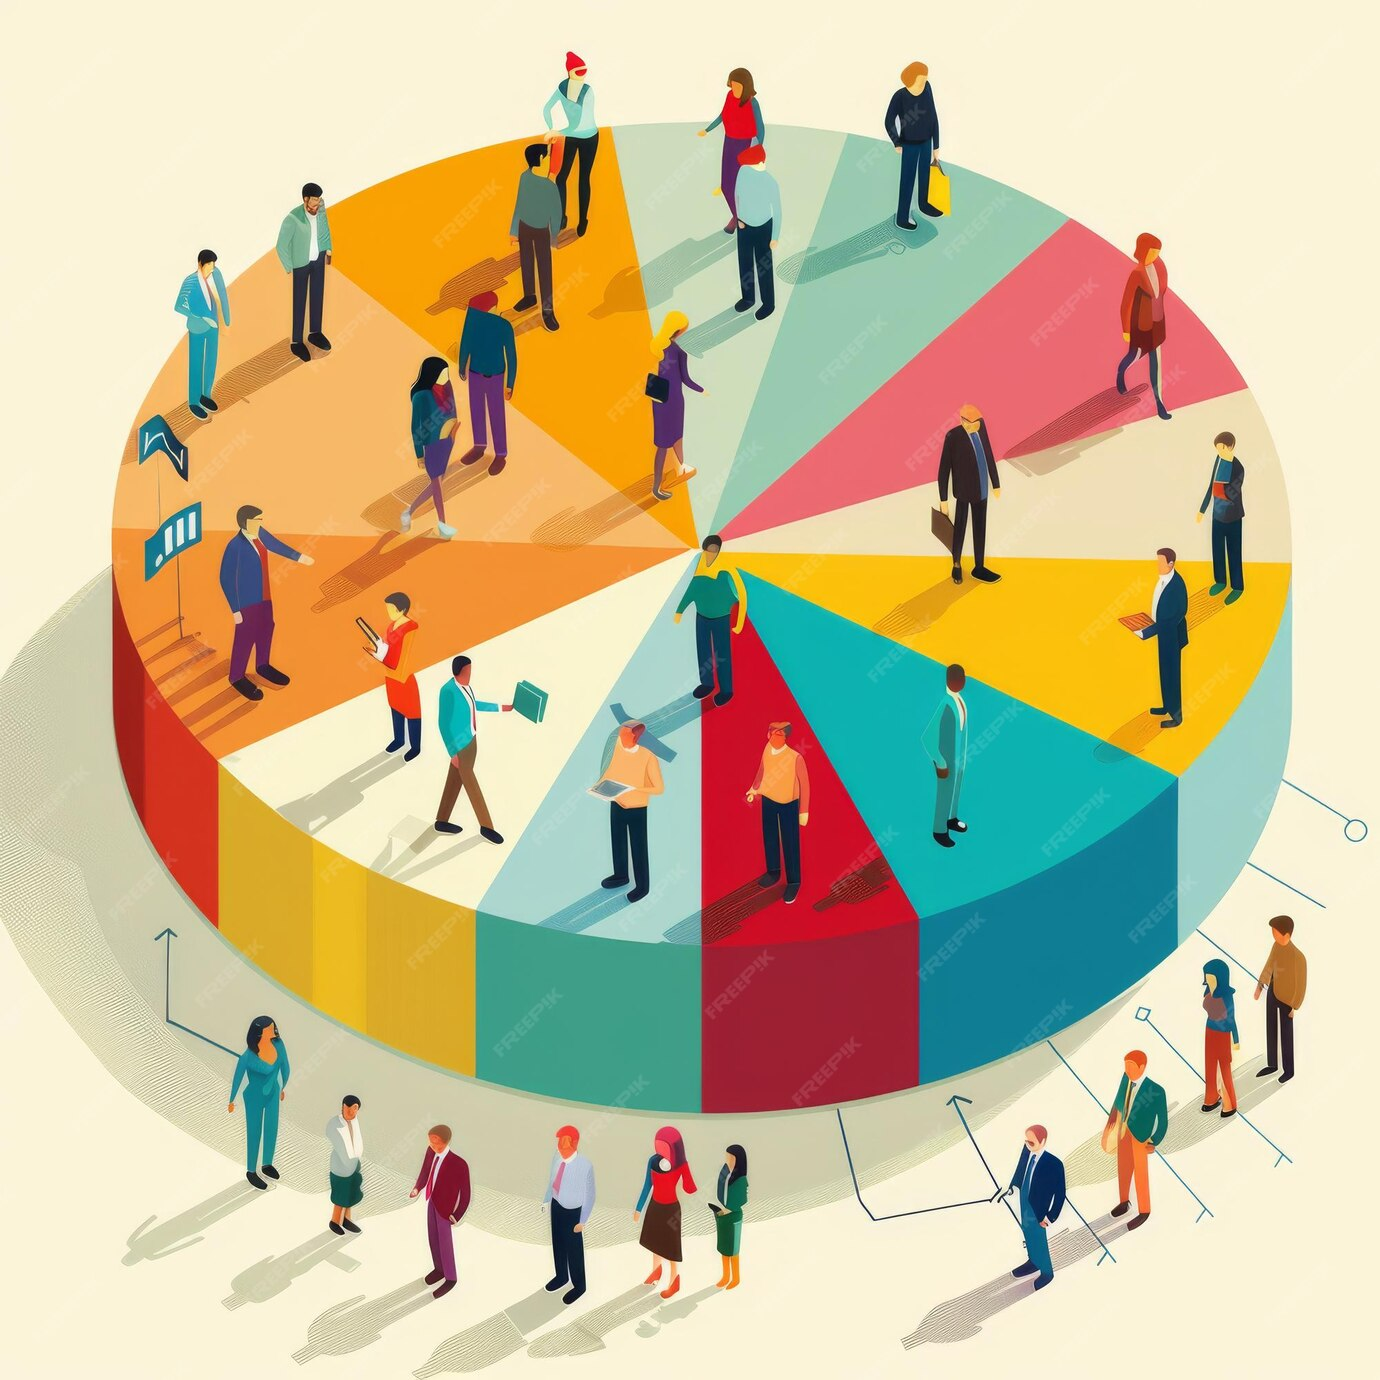

<div style='background-color: #cdcdb4; padding: 10px'>
<h1> Dataset</h1>   

The dataset consists of information derived from the past shopping behaviors of FLO customers who made their last purchases through OmniChannel (both online and offline shopping) during the years 2020-2021.
<blockquote><strong>Details</strong></blockquote>
<strong>12 Variables | 19.945 Observations</strong>
    
</div>

<table style="width:100%; border: 1px solid #ddd; border-collapse: collapse;">
  <colgroup>
    <col style="width: 32%;">
    <col style="width: 70%;">
  </colgroup>
  <tr style="background-color: #cdcdb4;">
    <th style="background-color: #cdcdb4; border: 1px solid #ddd; font-size: 13px; padding: 8px; text-align: left;">Variable</th>
    <th style="background-color: #cdcdb4; border: 1px solid #ddd; font-size: 13px; padding: 8px; text-align: left;">Description</th>
  </tr> 
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">master_id</td> 
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">Unique customer ID</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">order_channel</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">The channel used for shopping (Android, iOS, Desktop, Mobile)</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">last_order_channel</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">The channel used for the most recent purchase</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">first_order_date</td> 
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">The date of the customer's first purchase</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">last_order_date</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">The date of the customer's most recent purchase</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">last_order_date_online</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">The date of the customer's most recent online purchase</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">last_order_date_offline</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">The date of the customer's most recent offline purchase</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">order_num_total_ever_online</td> 
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">Total number of purchases made by the customer on the online platform</td>
  </tr>
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">order_num_total_ever_offline</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">Total number of purchases made by the customer offline</td>
  </tr>
    
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">customer_value_total_ever_offline</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">Total amount spent by the customer on offline purchases</td>
  </tr>
    
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">customer_value_total_ever_online</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">Total amount spent by the customer on online purchases
</td>
  </tr>
    
  <tr style="background-color: #cdcdb4;">
    <td style="border: 1px solid #ddd; padding: 8px;">interested_in_categories_12</td>
    <td style="border: 1px solid #ddd; background-color: #eeeed1; padding: 8px;">List of categories the customer has shopped in the last 12 months
  </tr>
</table>


<div style='background-color: #cdcdb4; padding: 10px;'>
    
<h1> Importing Necessary Libraries and Settings</h1> 
</div>

In [ ]:
import warnings
import pandas as pd
from scipy import stats
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns


warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 1000)


<div style='background-color: #cdcdb4; padding: 10px;'>
    
<h1>Reading the Dataset</h1> 
</div>

In [ ]:
flo = pd.read_csv('/kaggle/input/flo-data/flo_data_20k.csv')
df = flo.copy() # Creating a copy of the dataset for ease of use
df.head(3)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li>Quick overview of the dataset.</li>
    </ul>
</div>


In [ ]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li>Creating date variables</li>
    </ul>
</div>

In [ ]:
dates = df.columns[df.columns.str.contains('date')]
df[dates] = df[dates].apply(pd.to_datetime)
dates

In [ ]:
df['last_order_date'].max()

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li>Creating the analysis date by adding one day to the date</li>
    </ul>
</div>

In [ ]:
analysis_date = dt.datetime(2021,6,1)
type(analysis_date)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li>Information on how many days ago the last purchase was made</li>
    </ul>
</div>

In [ ]:
df['recency'] = (analysis_date - df['last_order_date']).dt.days
df['recency'].dtype

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li>Customer's age in the company</li>
    </ul>
</div>

In [ ]:
df['tenure'] = (df['last_order_date']- df['first_order_date']).dt.days
df['tenure'].dtype

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> I defined a new dataframe for the K-Means Clustering method. No need some variables for this process.</li>
    </ul>
</div>

In [ ]:
df_model= df[['order_num_total_ever_online','order_num_total_ever_offline','customer_value_total_ever_offline','customer_value_total_ever_online','recency','tenure']]
df_model.head(3)

<div style='background-color: #cdcdb4; padding: 10px;'>
    
<h1>Skewness Control</h1> 
</div>
<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> Examining the distribution of the data by checking for skewness. It means analyzing how the data is distributed and determining if there is any asymmetry in the distribution. Skewness measures the degree of distortion from the symmetrical bell curve (normal distribution) in the data.</li>

<li> This implies assessing the skewness of the data to better understand its distribution characteristics.</li>
    </ul>
</div>

In [ ]:
def check_skew(df_skew, col):
    skew = stats.skew(df_skew[col])
    skewtest = stats.skewtest(df_skew[col])
    plt.title('Distribution of ' + col)
    sns.histplot(df_skew[col], kde=True, color='g')
    print(f"{col}: Skew: {skew}, Skewtest: {skewtest}")
    return

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> After creating the graphs, it may be necessary to save them as permanent files. This can be useful for creating reports, sharing the graphs, or for future analysis.</li>
    </ul>
</div>

In [ ]:
cols = ['order_num_total_ever_online','order_num_total_ever_offline','customer_value_total_ever_offline','customer_value_total_ever_online','recency','tenure']
plt.figure(figsize=(12, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    check_skew(df_model, col)

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()

<div style='background-color: #8b8b7a; padding: 10px;'>
    <blockquote>
        <strong>Comment</strong>
    </blockquote>
</div>
<div style='background-color: #eeeed1; padding: 10px; color: black;'> 
        <ul>
            <li><strong>order_num_total_ever_online:</strong> The distribution is highly positively skewed, meaning there are a few customers with a very high number of online orders.</li>
            <li><strong>order_num_total_ever_offline:</strong> The distribution is extremely positively skewed, indicating a few customers have a significantly higher number of offline orders compared to the rest.</li>
            <li><strong>customer_value_total_ever_offline:</strong> This distribution is highly positively skewed, showing that a small number of customers have spent much more offline than others.</li>
            <li><strong>customer_value_total_ever_online:</strong> Similar to offline spending, online spending is also extremely positively skewed, with a few customers spending significantly more online.</li>
            <li><strong>recency:</strong> The distribution is moderately positively skewed, meaning there are slightly more customers who have shopped more recently.</li>
            <li><strong>tenure:</strong> This distribution is positively skewed, indicating that there are more customers with shorter tenure, but some have been with the company for a significantly longer period.</li>
                <li><strong>Overall, the results show that most variables are positively skewed, particularly in terms of spending and order numbers, indicating that a small number of customers account for a large portion of the sales and orders.</strong></li>
        </ul>
    </div>
</div>




<div style='background-color: #cdcdb4; padding: 10px;'>
    <h1>Logarithmic Transformation</h1> 
</div>
<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li>Function that applies logarithmic transformation. This function converts values in a column to a logarithmic scale. If there are negative or zero values, a minimum value is added to all values to ensure they are positive.</li>
        <li>Logarithmic transformation is applied to achieve a more normal distribution.</li>
    </ul>
</div>


In [ ]:
def log_transform(df, col):
    if (df[col] <= 0).any():
        df[col] = df[col] - df[col].min() + 1
    df[col] = np.log1p(df[col])
    return df

In [ ]:

for col in cols:
    df_model = log_transform(df_model, col)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To check after logarithmic transformation.</li>
    </ul>
</div>

In [ ]:
plt.figure(figsize=(12, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    check_skew(df_model, col)

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)
plt.show()

In [ ]:
df_model.head(3) #to check

<div style='background-color: #cdcdb4; padding: 10px;'>
    <h1>Feature Scaling</h1> 
</div>
<div style='background-color: #eeeed1; padding: 10px; color: black;'> 
    <ul>
        <li>To express the observation units (numerical columns) on the same scale.</li>
    </ul>
</div>


In [ ]:
def scale_df(df, feature_range=(0, 1)):
    scaler = MinMaxScaler(feature_range=feature_range)
    scaled = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled, columns=df.columns)
    return scaled_df

In [ ]:
df_model = scale_df(df_model)
df_model.head(3)

<div style='background-color: #cdcdb4; padding: 10px;'>
    <h1>K-Means Clustering</h1> 
    <blockquote>
        <strong>Elbow Method - Optimum Cluster</strong>
    </blockquote>
</div>

<div style='background-color: #eeeed1; padding: 10px; color: black;'> 
    <ul>
        <li>With this method, I can determine the optimal number of clusters and visualize it.</li>
        <li>Business problems, based on the information and needs, we can also decide the number of clusters ourselves.</li>
    </ul>
</div>


In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df_model)
elbow.show()



<div style='background-color: #cdcdb4; padding: 10px;'>
    <blockquote>
        <strong>Modeling</strong>
    </blockquote>
</div>

<div style='background-color: #eeeed1; padding: 10px; color: black;'> 
    <ul>
        <li><strong>Optimum Cluster:</strong> 7</li>
    </ul>
</div>

In [ ]:
k_means = KMeans(n_clusters = 7, random_state= 34).fit(df_model)
cluster = k_means.labels_
cluster

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To define segments for the K-means model.</li>
    </ul>
</div>

In [ ]:
df_model['kmeans_segment'] = cluster
df_model.head(3)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To ensure segments start from 1 and create the final dataframe.</li>
    </ul>
</div>

In [ ]:
df_final = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
df_final['kmeans_segment'] = cluster + 1
df_final.head(3)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To statistically examine the segments.</li>
    </ul>
</div>

In [ ]:
df_final.groupby('kmeans_segment').agg({'order_num_total_ever_online':['mean','min','max'],
                                  'order_num_total_ever_offline':['mean','min','max'],
                                  'customer_value_total_ever_offline':['mean','min','max'],
                                  'customer_value_total_ever_online':['mean','min','max'],
                                  'recency':['mean','min','max'],
                                  'tenure':['mean','min','max','count']})

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To reach customers belonging to any specific segment.</li> 
        <li> For example kmeans segment 4</li>
    </ul>
</div>

In [ ]:
df_final[df_final['kmeans_segment'] == 4].head(6)

<div style='background-color: #cdcdb4; padding: 10px;'>
    <h1>Hierarchical Clustering</h1> 
    <blockquote>
        <strong>Dendrogram</strong>
    </blockquote>
</div>

<div style='background-color: #eeeed1; padding: 10px; color: black;'> 
    <ul>
        <li>Using hierarchical clustering to create a dendrogram that merges elements in the dataset. </li>
        <li>In average linkage clustering, clustering is performed by calculating the average distance between all pairs of elements from different clusters. This method is utilized to identify homogeneous or heterogeneous groups within a dataset. Compared to other approaches like complete linkage or single linkage, it tends to provide a more balanced and average-based result.</li>
        <li>In essence, the term "hc_average" denotes how elements in the dataset are hierarchically merged using the average linkage method.</li>
        <li><strong>truncate_mode='lastp'</strong> and <strong>p=10</strong>show the last 10 merge points in the dendrogram.
        <li> <strong>show_contracted=Tru</strong> it shows the contracted clusters in the dendrogram.</li>
        <li> <strong>leaf_font_size=10</strong> sets the font size for leaf nodes in the dendrogram.</li>
    </ul>
</div>


In [ ]:
hc_average = linkage(df_model, 'average')

plt.figure(figsize=(7, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation Units')
plt.ylabel('Distances')
dend = dendrogram(hc_average,truncate_mode='lastp', p=10,
                  show_contracted=True, leaf_font_size=10)
plt.axhline(y=1.2, color='y', linestyle='--')

plt.show()


<div style='background-color: #cdcdb4; padding: 10px;'>
    <blockquote>
        <strong>Modeling</strong>
    </blockquote>
</div>

<div style='background-color: #eeeed1; padding: 10px; color: black;'> 
    <ul>
        <li><strong>Optimum Cluster:</strong> 5</li>
    </ul>
</div>

In [ ]:

hc = AgglomerativeClustering(n_clusters=5, linkage='average')
cluster = hc.fit_predict(df_model)
cluster


<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To define segments for the Hierarchical Clustering model.</li>
    </ul>
</div>

In [ ]:
df_model['hc_segment'] = cluster
df_model.head(3)

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To ensure segments start from 1 and add the final dataframe.</li>
    </ul>
</div>

In [ ]:
df_final['hc_segment'] = cluster + 1
df_final.head()

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To statistically examine the segments.</li>
    </ul>
</div>

In [ ]:
df_final.groupby('hc_segment').agg({'order_num_total_ever_online':['mean','min','max'],
                                  'order_num_total_ever_offline':['mean','min','max'],
                                  'customer_value_total_ever_offline':['mean','min','max'],
                                  'customer_value_total_ever_online':['mean','min','max'],
                                  'recency':['mean','min','max'],
                                  'tenure':['mean','min','max','count']})

<div style='background-color: #eeeed1; padding: 10px; color: black;'>
    <ul>
        <li> To reach customers belonging to any specific segment.</li> 
        <li> For example kmeans segment 4</li>
    </ul>
</div>

In [ ]:
df_final[df_final['hc_segment'] == 4].head(3)